# Airline On-Time Data

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import math
import itertools

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("data/2008.csv")

In [11]:
data.rename(index=str, columns={"Year": "year", "Month": "month", "DayofMonth": "day"}, inplace=True)

In [14]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [47]:
data.head()

,year,month,day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [23]:
ser = data.groupby('date').size()
len(ser)

366

# Query #1: Number of Flights per Day

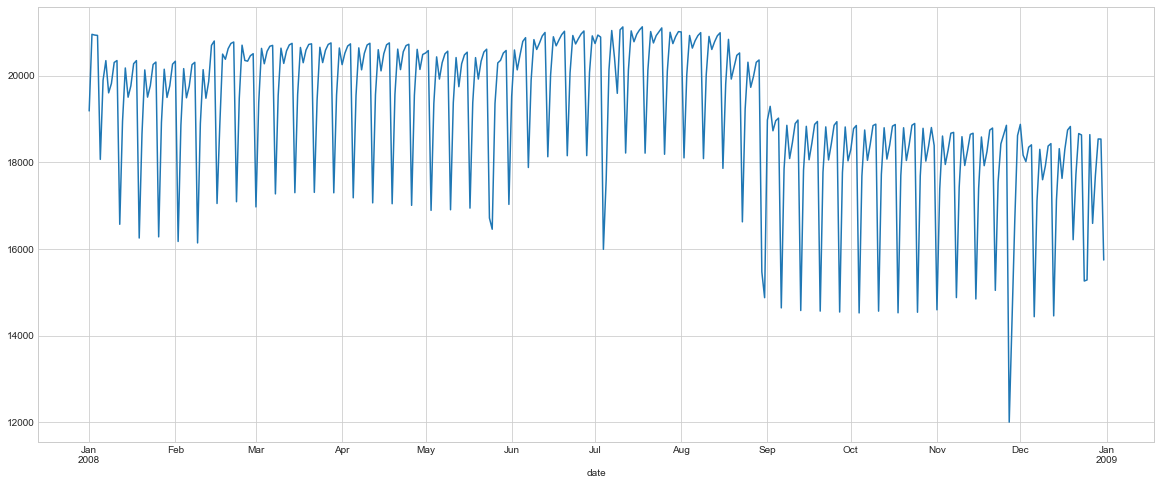

In [27]:
ser.plot();

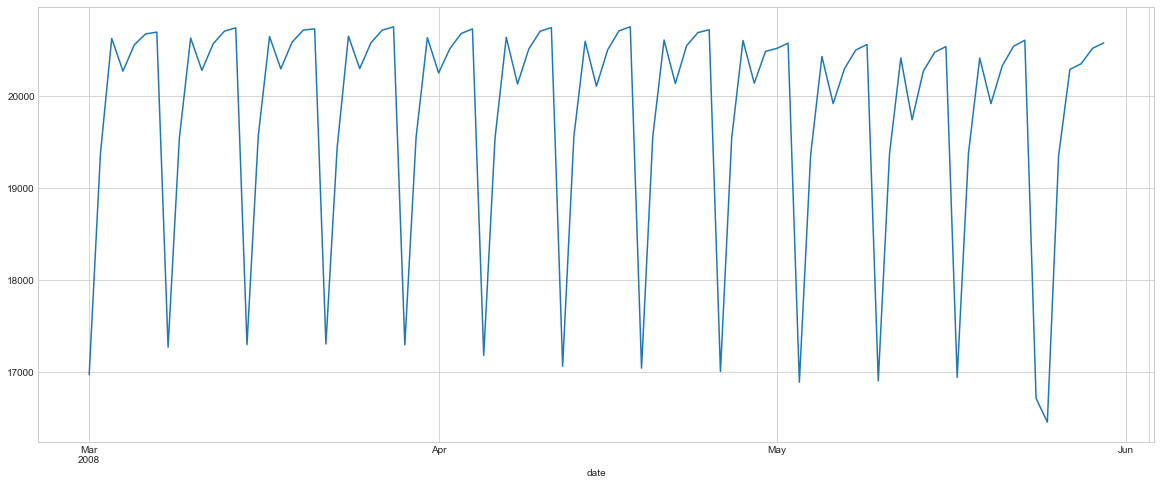

In [107]:
ser['2008-3-1':'2008-5-30'].plot();

# Query #2: Late Flights vs On-time Flights

In [54]:
late = data[data['ArrDelay'] > 0].groupby('date').size()
early = data[data['ArrDelay'] <= 0].groupby('date').size()

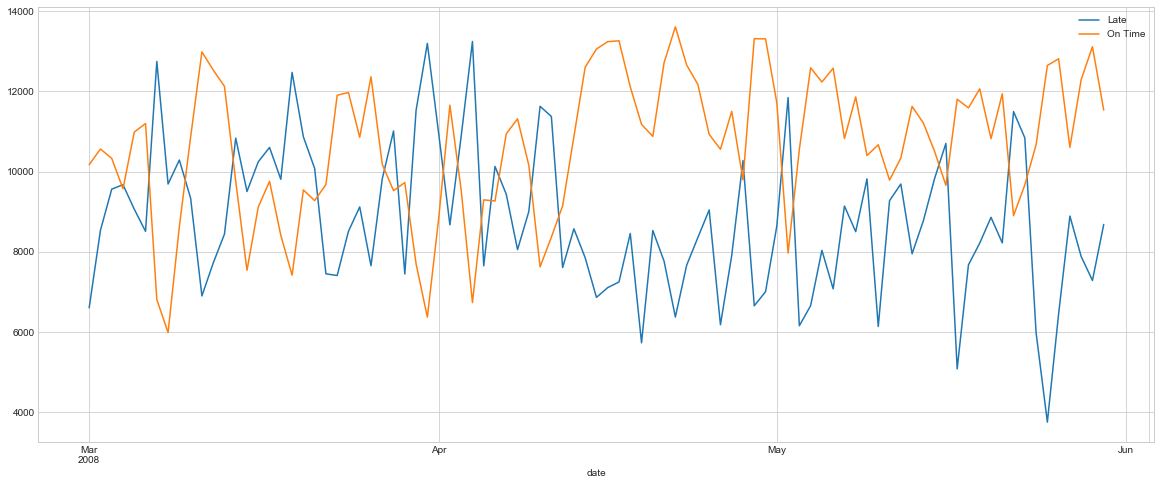

In [62]:
late['2008-3-1':'2008-5-30'].plot(label="Late", legend=True);
early['2008-3-1':'2008-5-30'].plot(label="On Time", legend=True);

# Query #3: Which Day Has the Most Late Flights

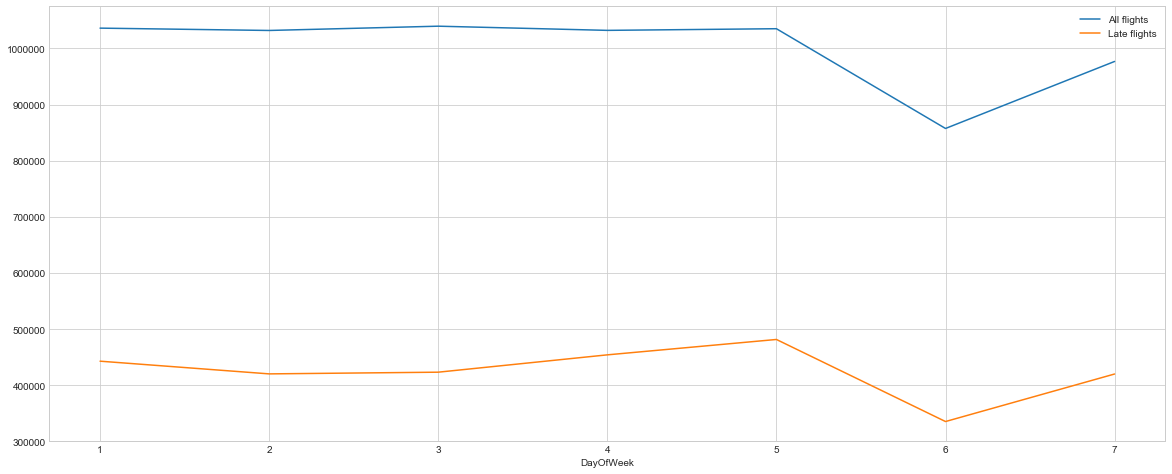

In [110]:
all_day = data.groupby('DayOfWeek').size()
late_day = data[data['ArrDelay'] > 0].groupby('DayOfWeek').size()
all_day.plot(label="All flights", legend=True);
late_day.plot(label="Late flights", legend=True);